### Investigate the behaviour of backprojection reconstruction with and without ramp-filtering., and with Hamming-windowed ramp-filtering.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import hamming
import cv2
import scipy
from skimage.transform import rotate
import scipy.fftpack as fft 
from PIL import Image
from IPython import display
import matplotlib.image as mpimg
from scipy.misc import imsave

In [13]:
file_path = './sinogram.png'
image = cv2.imread(file_path)
b, g, r = cv2.split(image)  # These are stored as numpy.ndarray types, be careful with operations performed

In [14]:
def backProject(channel, colourChannel):
    
    RGBChannel = ['Reds', 'Greens', 'Blues']
    
    laminogram = np.zeros((channel.shape[1],channel.shape[1]))
    
    # changed from 960 to 1440 (shape 0 -> 1)
    theta = 180.0
    dTheta = theta / channel.shape[0]
    
    
    for i in range(channel.shape[0]):
        temp = np.tile(channel[i],(channel.shape[1],1))
        temp = rotate(temp, dTheta*i)
        plt.imshow(laminogram,cmap=RGBChannel[colourChannel], interpolation='none')
        display.clear_output(wait=True)
        display.display(plt.show())
        
        laminogram += temp
    
    return laminogram

In [15]:
def filterTransform(channel):
    # fft translate
    channel = fft.rfft(channel, axis=1)
    # ramp filter
    ramp = np.floor(np.arange(0.5, channel.shape[1]//2 + 0.1, 0.5))
    channel = channel * ramp
    # inverst fft
    channel = fft.irfft(channel, axis=1)
    return channel

In [16]:
def filterTransformHamming(channel):
    
    #dont know why it's 566
    hamming = np.hamming(len(channel))
    channel = hamming*channel
    
    return channel

In [17]:
# (a) Reconstruction without ramp-filtering from the given sinogram;

In [18]:
# (b) reconstruction with ramp-filtering

In [19]:
# (c) reconstruction using a Hamming-windowed ramp-filter

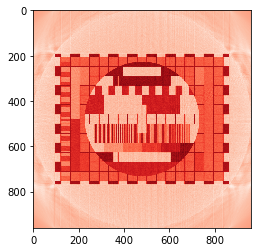

None

In [20]:
bFilteredRamp = filterTransform(b)
gFilteredRamp = filterTransform(g)
rFilteredRamp = filterTransform(r)

bp_b = backProject(bFilteredRamp, 2)
bp_g = backProject(gFilteredRamp, 1)
bp_r = backProject(rFilteredRamp, 0)

bp_bHamming = filterTransformHamming(bp_b)
bp_gHamming = filterTransformHamming(bp_g)
bp_rHamming = filterTransformHamming(bp_r)



In [21]:
bp_bHamming = filterTransformHamming(bp_b)
bp_gHamming = filterTransformHamming(bp_g)
bp_rHamming = filterTransformHamming(bp_r)

In [23]:
# Final channel merge
Finalimage = np.dstack((bp_r,bp_g,bp_b))
scipy.misc.imsave("FinalImage.png", Finalimage)




FinalimageHamming = np.dstack((bp_rHamming,bp_gHamming,bp_bHamming))
scipy.misc.imsave("FinalImageHamming.png", FinalimageHamming)